In [1]:
path = "D:\\TUANTA\\VTC Academiy\\AI VTCA Teaching Materials\\Short-Course AI\\4. AI Specialist(AI Engineer)\\2. Labs\\AI Specialist Support 03 (NLP)"
import os
os.chdir(path)
%pwd

'D:\\TUANTA\\VTC Academiy\\AI VTCA Teaching Materials\\Short-Course AI\\4. AI Specialist(AI Engineer)\\2. Labs\\AI Specialist Support 03 (NLP)'

In [5]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
# import plotly.graph_objs as go
# import cufflinks
# pd.options.display.max_columns = 30
# from IPython.core.interactiveshell import InteractiveShell
# import plotly.figure_factory as ff
# InteractiveShell.ast_node_interactivity = 'all'
# from plotly.offline import iplot
# cufflinks.go_offline()
# cufflinks.set_config_file(world_readable=True, theme='solar')

In [2]:
from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")

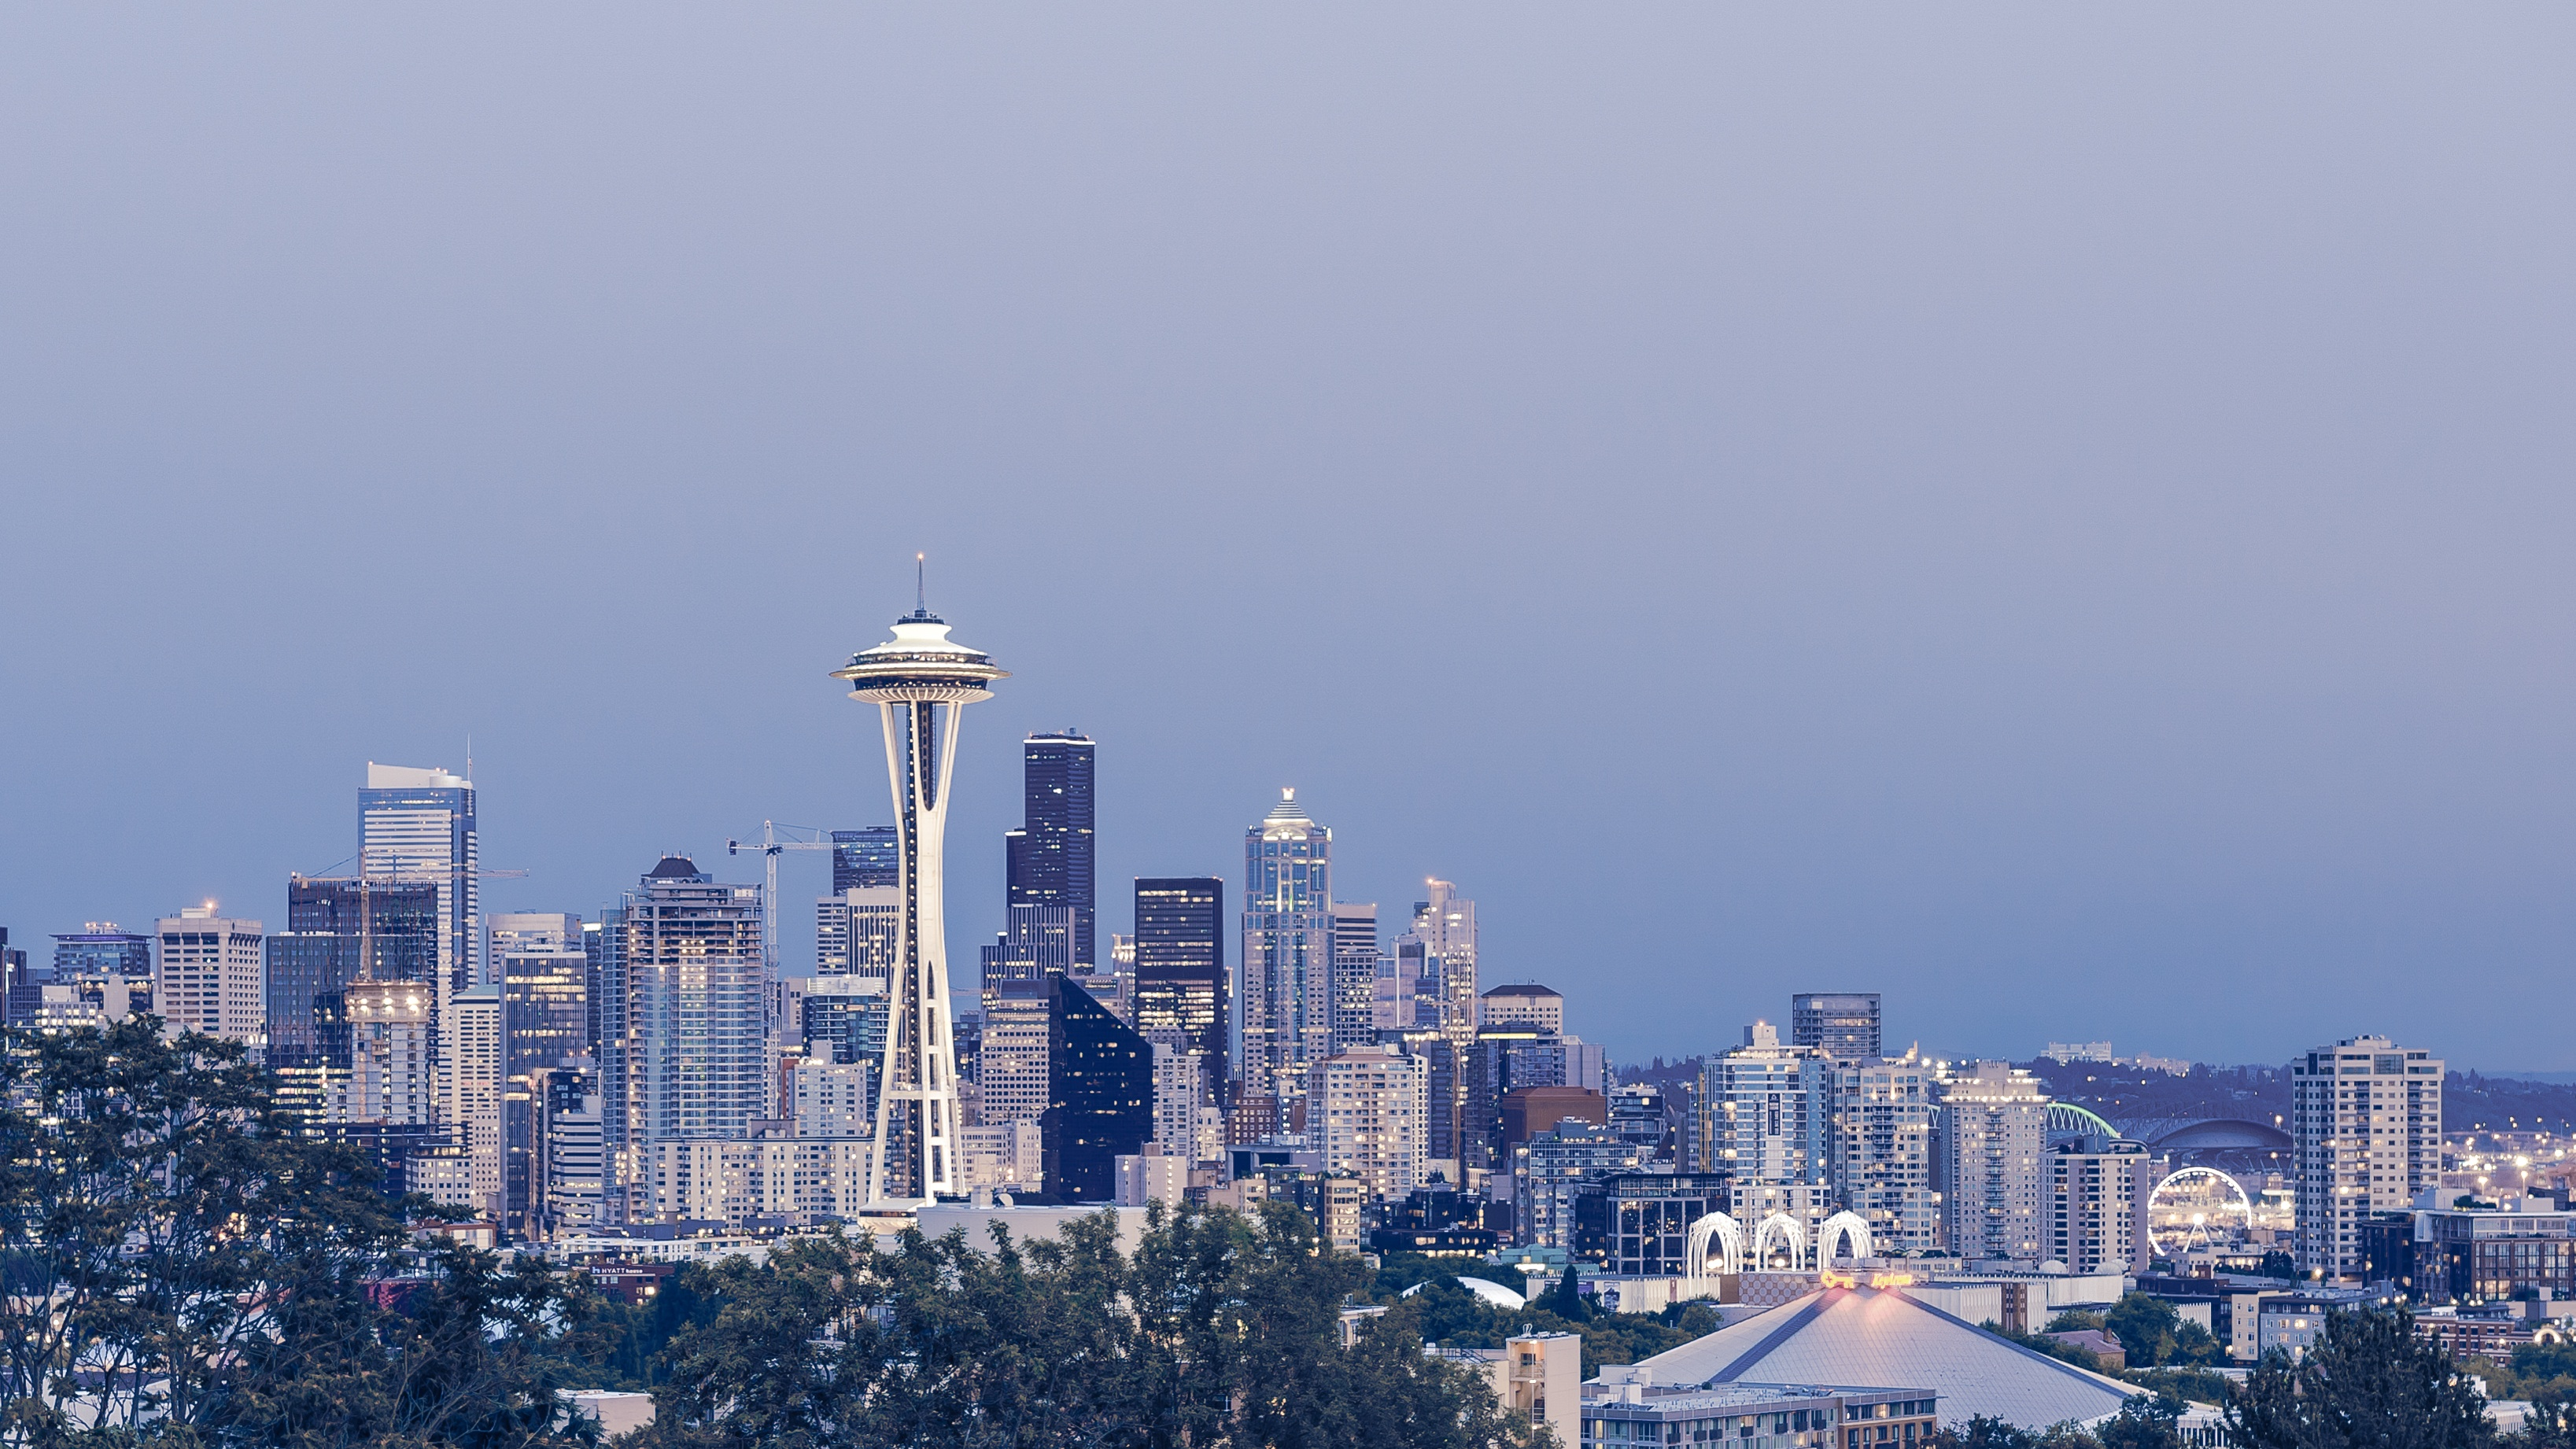

In [3]:
display(Image(filename='Seattle_Hotels.jpeg'))

In [6]:
df = pd.read_csv('Seattle_Hotels.csv', encoding="latin-1")

In [7]:
df.head()

,name,address,desc
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,The Westin Seattle,"1900 5th Avenue, Seattle, Washington 98101 USA",Situated amid incredible shopping and iconic a...


In [8]:
print('We have', len(df), 'hotels in the data')

We have 152 hotels in the data


In [9]:
def print_description(index):
    example = df[df.index == index][['desc', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])

In [10]:
print_description(10)

Soak up the vibrant scene in the Living Room Bar and get in the mix with our live music and DJ series before heading to a memorable dinner at TRACE. Offering inspired seasonal fare in an award-winning atmosphere, it's a not-to-be-missed culinary experience in downtown Seattle. Work it all off the next morning at FIT®, our state-of-the-art fitness center before wandering out to explore many of the area's nearby attractions, including Pike Place Market, Pioneer Square and the Seattle Art Museum. As always, we've got you covered during your time at W Seattle with our signature Whatever/Whenever® service - your wish is truly our command.
Name: W Seattle


In [11]:
print_description(100)

On a budget in Seattle or looking for something different? The historic charm and "home away from home" atmosphere of The Baroness will be sure to make you feel like one of the family. Conveniently located on First Hill, we are proud to be part of the Virginia Mason Hospital campus and only minutes from Harborview Medical Center and Swedish Hospital. The Baroness Hotel is a great option for short or long term medical, patient or family stays. Whether you are visiting the area's world-class medical facilities or on a budget vacation, our goal is to ensure a wonderful stay. Guest Amenities: Complimentary Internet access, Two twin, one or two queen studios with mini fridge and microwave, Two twin or one queen suites with full kitchens, Laundry facilities available, Flat screen cable television with HBO, Complimentary local calls, Ice and vending machines located in the lobby, Coffee maker and hairdryers in all guestrooms, Room service available seven days a week from the Rhododendron Cafe

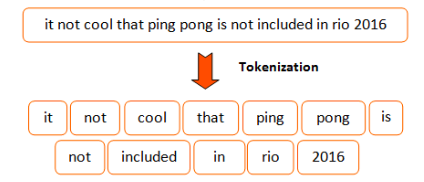

In [4]:
display(Image(filename='Tokenize.png'))

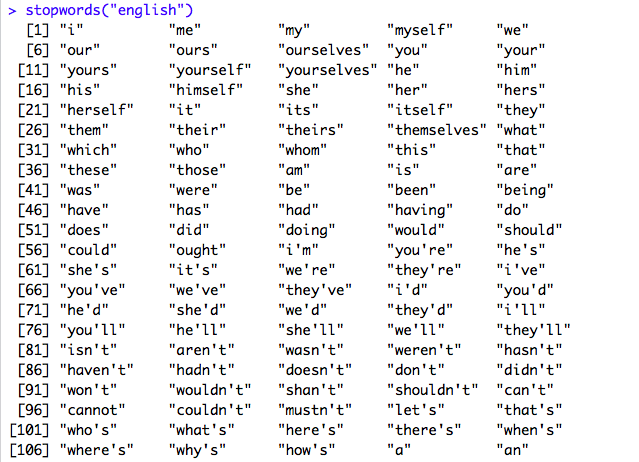

In [6]:
display(Image(filename='Stopword.png'))

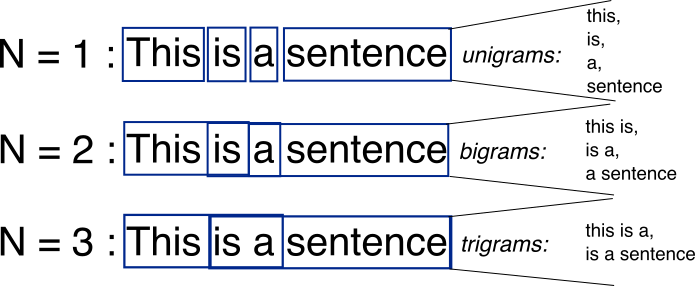

In [7]:
display(Image(filename='NGram.png'))

In [35]:
# Visualize Token (vocabulary) Frequency Distribution Before Removing Stop Words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
    
common_words = get_top_n_words(df['desc'], 20)
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
# Top 20 words in hotel description before removing stop words
df1.groupby('desc').sum()['count'].sort_values()

desc
on           129
downtown     133
are          136
center       151
or           161
your         186
for          216
from         224
at           231
is           271
with         280
hotel        295
you          304
our          359
in           449
to           471
seattle      533
of           536
and         1062
the         1258
Name: count, dtype: int64

In [36]:
# Visualize Token (vocabulary) Frequency Distribution After Removing Stop Words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['desc'], 20)
df2 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
# Top 20 words in hotel description after removing stop words
df2.groupby('desc').sum()['count'].sort_values()

desc
breakfast     68
room          77
city          79
just          82
business      87
inn           89
pike          90
enjoy         93
market        97
space         97
airport       99
place        102
stay         105
rooms        106
located      108
free         123
downtown     133
center       151
hotel        295
seattle      533
Name: count, dtype: int64

In [37]:
# Bigrams Frequency Distribution Before Removing Stop Word
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['desc'], 20)
df3 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
# title='Top 20 bigrams in hotel description before removing stop words'
df3.groupby('desc').sum()['count'].sort_values(ascending=False)

desc
in the              147
of the              133
pike place           86
place market         85
to the               81
downtown seattle     79
from the             79
and the              72
space needle         68
at the               67
in seattle           60
the seattle          57
our hotel            54
hotel is             49
of our               45
the city             45
of seattle           44
one of               42
you ll               41
the space            40
Name: count, dtype: int64

In [38]:
# Bigrams Frequency Distribution After Removing Stop Word
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['desc'], 20)
df4 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
# 'Top 20 bigrams in hotel description After removing stop words'
df4.groupby('desc').sum()['count'].sort_values(ascending=False)

desc
pike place               86
place market             85
downtown seattle         80
space needle             68
wi fi                    37
guest rooms              34
seattle hotel            33
pacific northwest        33
fitness center           32
hotel seattle            30
lake union               30
24 hour                  28
international airport    27
business center          27
seattle airport          26
high speed               25
seattle tacoma           25
university washington    24
seattle center           24
convention center        21
Name: count, dtype: int64

In [39]:
# Trigrams Frequency Distribution Before Removing Stop Word
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['desc'], 20)
df5 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
# 'Top 20 trigrams in hotel description before removing stop words'
df5.groupby('desc').sum()['count'].sort_values(ascending=False)

desc
pike place market               85
the space needle                39
the heart of                    33
in the heart                    28
located in the                  26
place market and                24
the pacific northwest           23
university of washington        23
one of the                      22
tacoma international airport    21
seattle tacoma international    21
easy access to                  20
free wi fi                      19
of the city                     17
washington state convention     17
our hotel is                    16
of downtown seattle             16
seattle art museum              16
state convention center         15
hotel in seattle                15
Name: count, dtype: int64

In [40]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['desc'], 20)
df6 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
# 'Top 20 trigrams in hotel description after removing stop words'
df6.groupby('desc').sum()['count'].sort_values(ascending=False)

desc
pike place market               85
tacoma international airport    21
seattle tacoma international    21
free wi fi                      19
washington state convention     17
seattle art museum              16
place market seattle            16
state convention center         15
high speed internet             14
space needle pike               12
needle pike place               11
south lake union                11
sea tac airport                 10
downtown seattle hotel          10
home away home                   9
link light rail                  8
just minutes away                8
heart downtown seattle           8
free high speed                  8
24 hour fitness                  7
Name: count, dtype: int64

In [19]:
# Hotel Description Length Distribution
df['word_count'] = df['desc'].apply(lambda x: len(str(x).split()))

In [20]:
desc_lengths = list(df['word_count'])

print("Number of descriptions:",len(desc_lengths),
      "\nAverage word count", np.average(desc_lengths),
      "\nMinimum word count", min(desc_lengths),
      "\nMaximum word count", max(desc_lengths))

Number of descriptions: 152 
Average word count 156.94736842105263 
Minimum word count 16 
Maximum word count 494


In [ ]:
# The data was collected by myself, so there relatively clean, no extreme outliers.

# Preprocessing hotel description text
# The test is pretty clean, we don't have a lot to do, but just in case.

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
df['desc_clean'] = df['desc'].apply(clean_text)

In [25]:
def print_description(index):
    example = df[df.index == index][['desc_clean', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])
print_description(10)

soak vibrant scene living room bar get mix live music dj series heading memorable dinner trace offering inspired seasonal fare awardwinning atmosphere nottobemissed culinary experience downtown seattle work next morning fit stateoftheart fitness center wandering explore many areas nearby attractions including pike place market pioneer square seattle art museum always weve got covered time w seattle signature whatever whenever service wish truly command
Name: W Seattle


In [26]:
print_description(100)

budget seattle looking something different historic charm home away home atmosphere baroness sure make feel like one family conveniently located first hill proud part virginia mason hospital campus minutes harborview medical center swedish hospital baroness hotel great option short long term medical patient family stays whether visiting areas worldclass medical facilities budget vacation goal ensure wonderful stay guest amenities complimentary internet access two twin one two queen studios mini fridge microwave two twin one queen suites full kitchens laundry facilities available flat screen cable television hbo complimentary local calls ice vending machines located lobby coffee maker hairdryers guestrooms room service available seven days week rhododendron cafe limited wheelchair accessibility guest library business center printing fax services available 100 nonsmoking pet free rooms air conditioned fans available selfparking available virginia mason hospital fee
Name: The Baroness Hot

In [27]:
df.set_index('name', inplace = True)

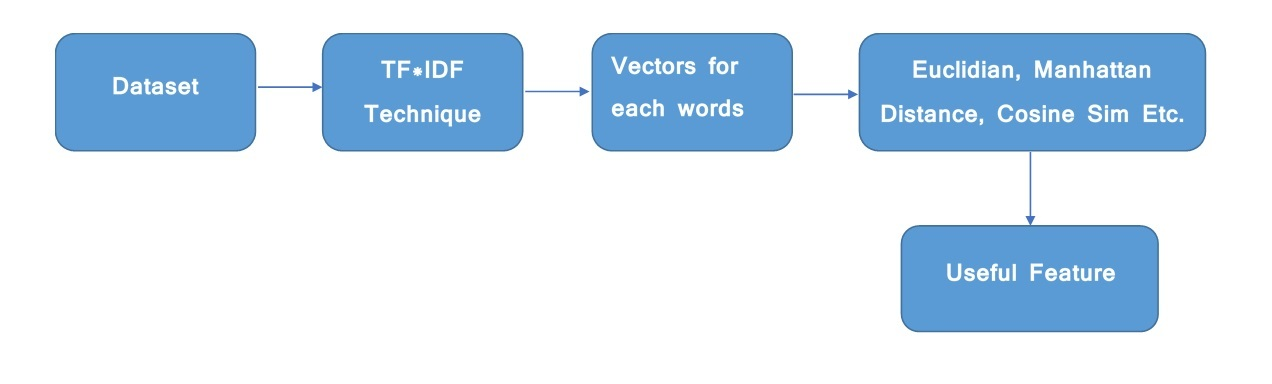

In [9]:
display(Image(filename='TFIDF 03.jpg'))

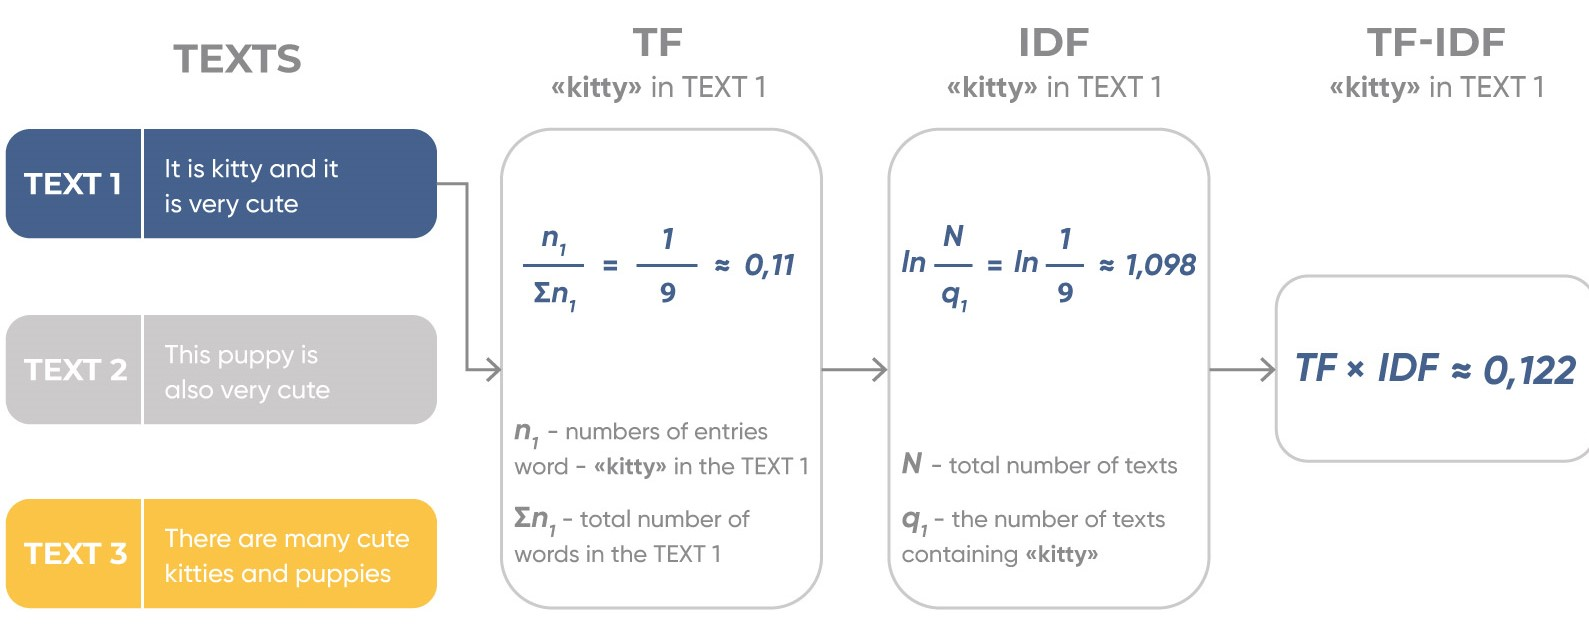

In [15]:
display(Image(filename='TFIDF 04.jpg'))

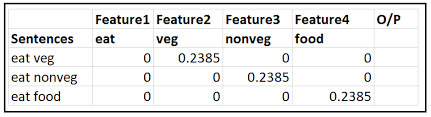

In [11]:
display(Image(filename='TFIDF 05.png'))

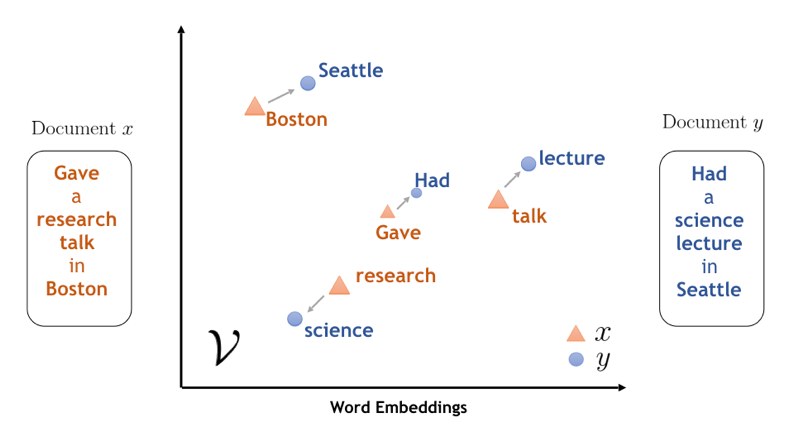

In [16]:
display(Image(filename='Word Embedding.png'))

In [28]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['desc_clean'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [29]:
indices = pd.Series(df.index)

In [30]:
indices[:50]

0                        Hilton Garden Seattle Downtown
1                                Sheraton Grand Seattle
2                         Crowne Plaza Seattle Downtown
3                         Kimpton Hotel Monaco Seattle 
4                                    The Westin Seattle
5                           The Paramount Hotel Seattle
6                                        Hilton Seattle
7                                         Motif Seattle
8                                       Warwick Seattle
9                            Four Seasons Hotel Seattle
10                                            W Seattle
11                                   Gand Hyatt Seattle
12                                 Kimpton Alexis Hotel
13                                            Hotel Max
14                                    Ace Hotel Seattle
15                          Seattle Marriott Waterfront
16                          The Edgewater Hotel Seattle
17                   SpringHill Suites Seattle D

In [31]:
def recommendations(name, cosine_similarities = cosine_similarities):
    
    recommended_hotels = []
    
    # gettin the index of the hotel that matches the name
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar hotels except itself
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the names of the top 10 matching hotels
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])
        
    return recommended_hotels

In [32]:
recommendations('Hilton Seattle Airport & Conference Center')

['Embassy Suites by Hilton Seattle Tacoma International Airport',
 'DoubleTree by Hilton Hotel Seattle Airport',
 'Seattle Airport Marriott',
 'Motel 6 Seattle Sea-Tac Airport South',
 'Econo Lodge SeaTac Airport North',
 'Four Points by Sheraton Downtown Seattle Center',
 'Knights Inn Tukwila',
 'Econo Lodge Renton-Bellevue',
 'Hampton Inn Seattle/Southcenter',
 'Radisson Hotel Seattle Airport']

In [33]:
recommendations("The Bacon Mansion Bed and Breakfast")

['11th Avenue Inn Bed and Breakfast',
 'Shafer Baillie Mansion Bed & Breakfast',
 'Chittenden House Bed and Breakfast',
 'Gaslight Inn',
 'Bed and Breakfast Inn Seattle',
 'Silver Cloud Hotel - Seattle Broadway',
 'Hyatt House Seattle',
 'Mozart Guest House',
 'Quality Inn & Suites Seattle Center',
 'MarQueen Hotel']